In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import BernoulliNB
import nltk# FOR TEXT PROCESSING
from wordcloud import WordCloud,STOPWORDS
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
import re
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer#TEXT PROCESSING
import missingno as mns# CHECKING FOR MISSING
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
nltk.download('stopwords')
stopwords = stopwords.words('english')

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


In [26]:
df = pd.read_csv('bbc-text.csv')
df.head()

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


In [27]:
df.head()

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


In [28]:
df.tail()

,category,text
2220,business,cars pull down us retail figures us retail sal...
2221,politics,kilroy unveils immigration policy ex-chatshow ...
2222,entertainment,rem announce new glasgow concert us band rem h...
2223,politics,how political squabbles snowball it s become c...
2224,sport,souness delight at euro progress boss graeme s...


In [29]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
nltk.download('punkt')

def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    filtered_words = [word for word in word_tokens if word.lower() not in stop_words]
    return ''.join(filtered_words)
df['cleaned_text'] = df['text'].apply(remove_stopwords)

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading punkt: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


LookupError: 
**********************************************************************
  Resource [93mpunkt[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt/english.pickle[0m

  Searched in:
    - 'C:\\Users\\URIM/nltk_data'
    - 'c:\\Users\\URIM\\AppData\\Local\\Programs\\Python\\Python39\\nltk_data'
    - 'c:\\Users\\URIM\\AppData\\Local\\Programs\\Python\\Python39\\share\\nltk_data'
    - 'c:\\Users\\URIM\\AppData\\Local\\Programs\\Python\\Python39\\lib\\nltk_data'
    - 'C:\\Users\\URIM\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
    - ''
**********************************************************************


In [32]:
from collections import Counter
wordlist = ''.join(df['text'])
words = wordlist.split()
wordcount = Counter(words)
topword = dict(wordcount.most_common(20))
leastword = dict(wordcount.most_common()[:-21:-1])


In [33]:
topword

{'the': 52557,
 'to': 24955,
 'of': 19947,
 'and': 18561,
 'a': 18247,
 'in': 17570,
 's': 9002,
 'for': 8884,
 'is': 8515,
 'that': 8133,
 'it': 7584,
 'on': 7460,
 'was': 6016,
 'he': 5932,
 'be': 5764,
 'with': 5313,
 'said': 5072,
 'as': 4976,
 'has': 4952,
 'have': 4744}

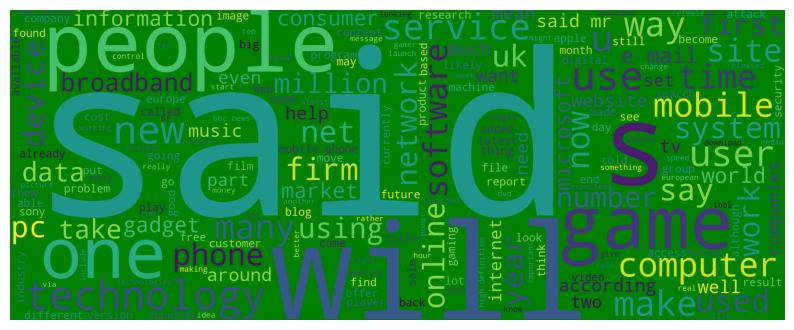

In [34]:
newdata = df[df['category'] == 'tech']
words = ' '.join(newdata['text'])
cleanword = ' '.join([word for word in words.split()
                      if 'http' not in word and not word.startswith('@')
                      and word != 'RT'])
WC=WordCloud(stopwords=STOPWORDS,background_color='green',width=2000, height=800).generate(cleanword)
plt.figure(1, figsize=(10,10))
plt.imshow(WC)
plt.axis('off')
plt.show()

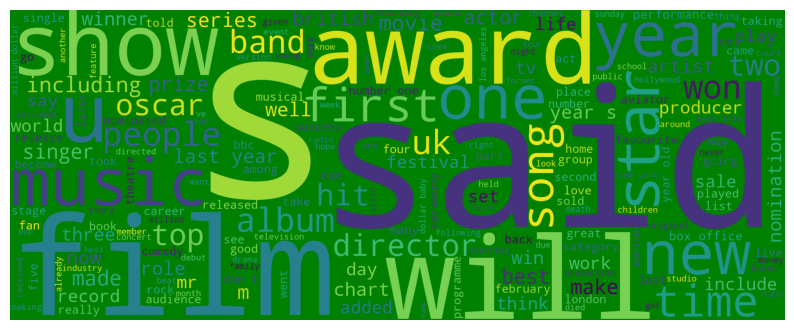

In [35]:
newdata = df[df['category'] == 'entertainment']
words = ' '.join(newdata['text'])
cleanword = ' '.join([word for word in words.split()
                      if 'http' not in word and not word.startswith('@')
                      and word != 'RT'])
WC=WordCloud(stopwords=STOPWORDS,background_color='green',width=2000, height=800).generate(cleanword)
plt.figure(1, figsize=(10,10))
plt.imshow(WC)
plt.axis('off')
plt.show()

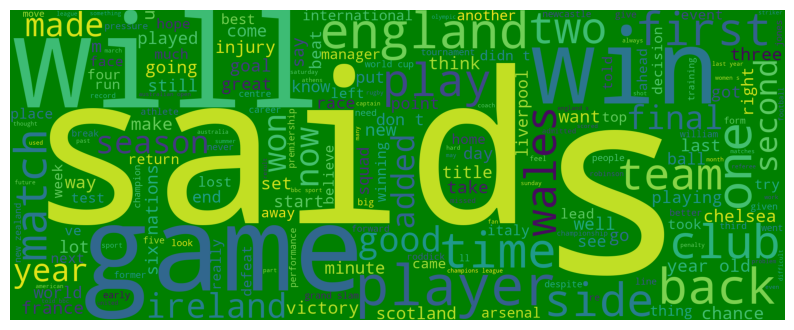

In [36]:
newdata = df[df['category'] == 'sport']
words = ' '.join(newdata['text'])
cleanword = ' '.join([word for word in words.split()
                      if 'http' not in word and not word.startswith('@')
                      and word != 'RT'])
WC=WordCloud(stopwords=STOPWORDS,background_color='green',width=2000, height=800).generate(cleanword)
plt.figure(1, figsize=(10,10))
plt.imshow(WC)
plt.axis('off')
plt.show()

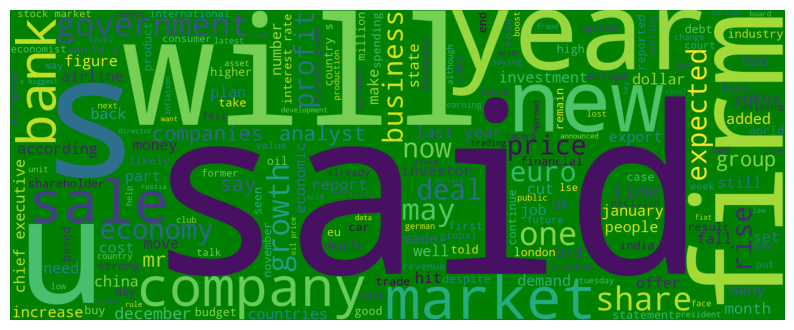

In [37]:
newdata = df[df['category'] == 'business']
words = ' '.join(newdata['text'])
cleanword = ' '.join([word for word in words.split()
                      if 'http' not in word and not word.startswith('@')
                      and word != 'RT'])
WC=WordCloud(stopwords=STOPWORDS,background_color='green',width=2000, height=800).generate(cleanword)
plt.figure(1, figsize=(10,10))
plt.imshow(WC)
plt.axis('off')
plt.show()

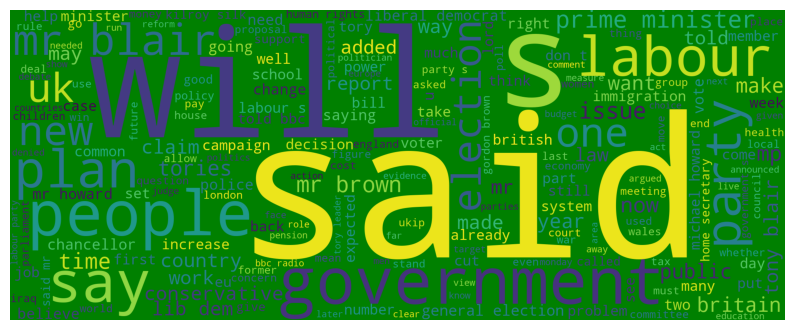

In [38]:
newdata = df[df['category'] == 'politics']
words = ' '.join(newdata['text'])
cleanword = ' '.join([word for word in words.split()
                      if 'http' not in word and not word.startswith('@')
                      and word != 'RT'])
WC=WordCloud(stopwords=STOPWORDS,background_color='green',width=2000, height=800).generate(cleanword)
plt.figure(1, figsize=(10,10))
plt.imshow(WC)
plt.axis('off')
plt.show()

In [39]:
df.isnull().sum()

category    0
text        0
dtype: int64

In [40]:
x = df.text
y = df['category']


In [41]:
xtrain, xtest,ytrain,ytest = train_test_split(x,y, test_size=0.2,random_state=400)

In [44]:
naivebayes = Pipeline([('vectorizer', CountVectorizer()), ('Transformer', TfidfTransformer()), ('Model', BernoulliNB())])
mlp = Pipeline([('vectorizer', CountVectorizer()), ('Transformer', TfidfTransformer()), ('Model', MLPClassifier(hidden_layer_sizes= (10,10)))])

In [45]:
naivebayes.fit(xtrain,ytrain)

Pipeline(steps=[('vectorizer', CountVectorizer()),
                ('Transformer', TfidfTransformer()), ('Model', BernoulliNB())])

In [46]:
pred1 = naivebayes.predict(xtest)
pred1

array(['politics', 'sport', 'business', 'sport', 'entertainment',
       'politics', 'tech', 'sport', 'sport', 'sport', 'business',
       'entertainment', 'business', 'politics', 'tech', 'business',
       'entertainment', 'sport', 'politics', 'tech', 'business',
       'business', 'entertainment', 'politics', 'tech', 'sport',
       'business', 'business', 'politics', 'business', 'politics',
       'business', 'sport', 'entertainment', 'sport', 'sport', 'business',
       'tech', 'business', 'business', 'sport', 'business', 'sport',
       'business', 'entertainment', 'sport', 'business', 'entertainment',
       'sport', 'business', 'entertainment', 'business', 'entertainment',
       'business', 'sport', 'sport', 'politics', 'business',
       'entertainment', 'tech', 'business', 'entertainment', 'politics',
       'sport', 'business', 'tech', 'sport', 'politics', 'sport',
       'politics', 'entertainment', 'politics', 'business', 'business',
       'sport', 'tech', 'entertainment'

In [47]:
print(classification_report(ytest, pred1))

               precision    recall  f1-score   support

     business       0.90      0.98      0.94       111
entertainment       0.97      0.91      0.94        77
     politics       0.92      0.93      0.93        73
        sport       1.00      1.00      1.00       112
         tech       0.98      0.90      0.94        72

     accuracy                           0.95       445
    macro avg       0.96      0.95      0.95       445
 weighted avg       0.95      0.95      0.95       445



<Axes: >

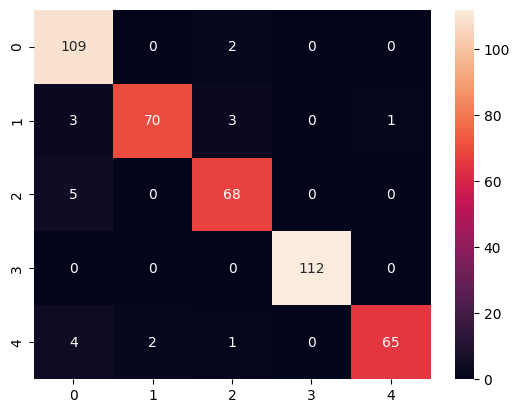

In [48]:
cm = confusion_matrix(ytest, pred1)
sns.heatmap(cm, annot=True, fmt = '0.5g')